In [3]:
# path_dir = '../datasets/transport/'
# for root, dirs, files in os.walk(path_dir):
#     for file in files:
#         for str in ['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']:
#             if str in file:
#                 # Create the new filename
#                 new_filename = f'YG0{str}_{file}'
                
#                 # Rename the file
#                 source_path = os.path.join(root, file)
#                 destination_path = os.path.join(root, new_filename)
#                 os.rename(source_path, destination_path)
#                 print(f"Renamed: {source_path} -> {destination_path}")
# # write a code to copy all files in path_dir or subdirectories of path_dir to path_dir

# import os
# import shutil

# def copy_files_to_path_dir(path_dir):
#     for root, dirs, files in os.walk(path_dir):
#         for file in files:
#             source_path = os.path.join(root, file)
#             destination_path = os.path.join(path_dir, file)
#             shutil.copy(source_path, destination_path)
#             print(f"Copied: {source_path} -> {destination_path}")

#     # Replace 'path_dir' with the directory you want to copy files from and to.
# path_dir = '../datasets/transport/'
# copy_files_to_path_dir(path_dir)

In [4]:

# def load_rho_T(file_name, d, w, l):
#     e = 1.60217663e-19
#     df = pd.read_csv(file_name, sep='\s+')
#     T = df['T_sample_(K)']
#     rho = df['R_nv']* w * d / l
#     return T, rho

# def plot_rho_T(properties, w, l):
#     plt.figure(figsize=(12,8))
#     for prop in properties:
#         T, rho = load_rho_T(prop[0], prop[1], w, l)
#         plt.plot(T, rho*1e8, label=prop[2])
#     plt.xlabel('Temperature (K)')
#     plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
#     plt.legend()
#     plt.show()   
    
# def carrier_density(properties):
#     e = 1.60217663e-19

#     fig, axes = plt.subplots(1, len(properties), figsize=(16,4))
#     for i, prop in enumerate(properties):
#         df = pd.read_csv(prop[3], sep='\s+')
#         B = df['B_analog_(T)']
#         R = df['R_nv']

#         a, b = np.polyfit(B, R, 1)
#         R_fit = a*B+b
#         n = 1/(a*(-e)*prop[1])/1e6
#         n = np.round(n, 2)
        
#         axes[i].plot(B, R, label=prop[2])
#         axes[i].plot(B, R_fit, label='fitted:'+str(np.round(a, 4))+'*y'+str(np.round(b, 4)))
#         axes[i].legend()
#         axes[i].set_xlabel('Magnetic field (T)')
#         axes[i].set_ylabel('Resistivity (\u03BC\u03A9 cm)')
#         axes[i].set_title('carrier density: n ='+format(n,'.2e')+'/ cm^3')
#     plt.show()
#     return 

In [2]:
%load_ext autoreload
%autoreload 2
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src/')
from electric_properties import Resistivity_temperature, hall_measurement

# Set 1 - YG028, YG029, YG030

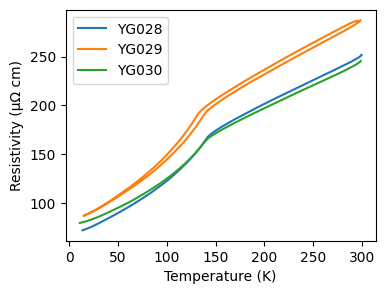

In [3]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 40*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_RT.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_RT.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT.dat']
R_list, T_list = [], []

for d, file in zip(d_list, files):
    func = Resistivity_temperature(file, printing=True)
    R, T = func.calculate_R_T(d=d, w=w, l=l)
    R_list.append(R)
    T_list.append(T)
func.plot_R_T(R_list, T_list, ['YG028', 'YG029', 'YG030'])

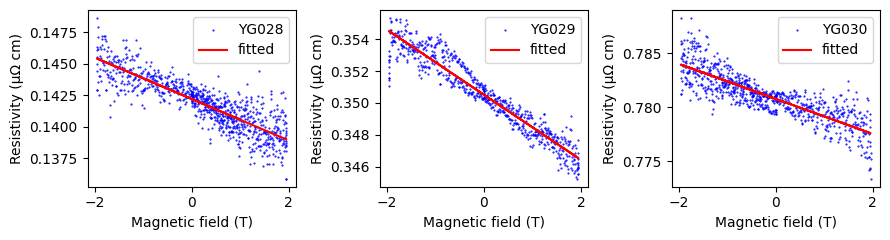

In [17]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 40*1e-9, 36.2*1e-9, 36.2*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall_2.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall_2.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_Hall_2.dat']
labels = ['YG028', 'YG029', 'YG030']
R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], [], []
for d, file in zip(d_list, files):

    hall_func = hall_measurement(file, printing=False)
    R_fit, a, b, B, R = hall_func.fit_B_R()
    # B = -B
    R_H = hall_func.calculate_hall_coefficient(d)
    n = hall_func.calculate_carrier_density(d)

    R_H_list.append(R_H)   
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list, labels, figsize=(9,2.5), plot_fitted=True)

In [18]:
from datafed.CommandLib import API
api = API()

Exception: Timeout waiting for server connection.

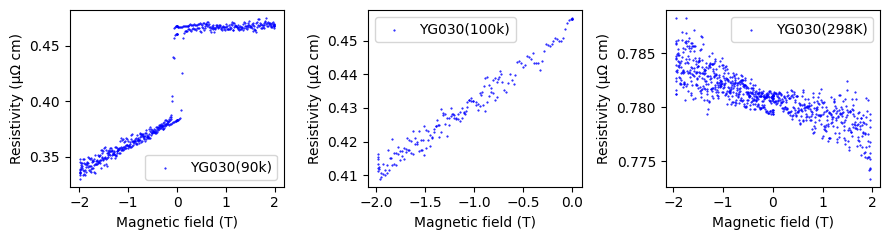

In [15]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 40*1e-9, 36.2*1e-9, 36.2*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_90k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_100k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_Hall_2.dat']
labels = ['YG030(90k)', 'YG030(100k)', 'YG030(298K)']
R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], [], []
for d, file in zip(d_list, files):

    hall_func = hall_measurement(file, printing=False)
    R_fit, a, b, B, R = hall_func.fit_B_R()
    R_H = hall_func.calculate_hall_coefficient(d)
    n = hall_func.calculate_carrier_density(d)

    R_H_list.append(R_H)   
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list, labels, figsize=(9,2.5), plot_fitted=False)

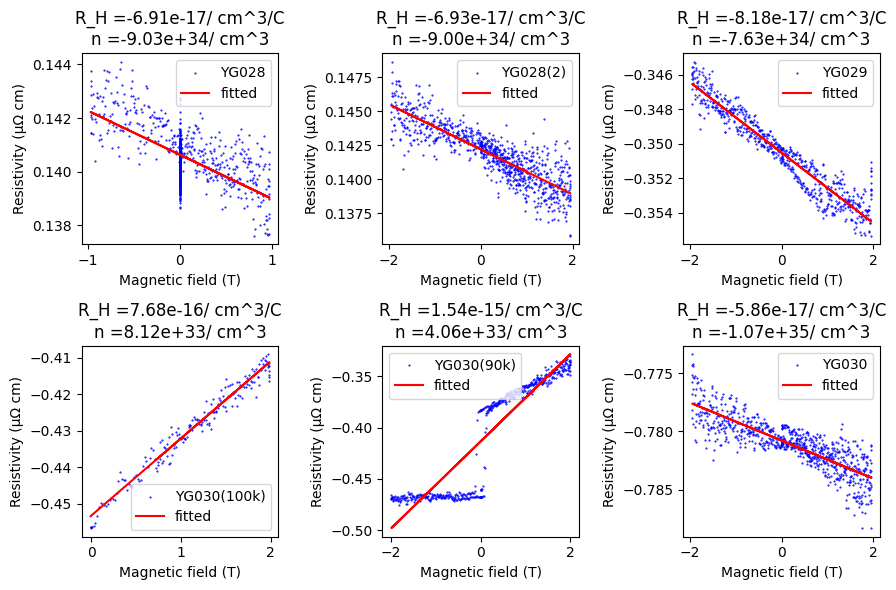

In [7]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 40*1e-9, 36.2*1e-9, 36.2*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall_2.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall_2.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_100k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_90k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_Hall_2.dat']
labels = ['YG028', 'YG028(2)', 'YG029', 'YG030(100k)', 'YG030(90k)', 'YG030']
R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], [], []
for d, file in zip(d_list, files):

    hall_func = hall_measurement(file, printing=False)
    R_fit, a, b, B, R = hall_func.fit_B_R()
    R_H = hall_func.calculate_hall_coefficient(d)
    n = hall_func.calculate_carrier_density(d)

    R_H_list.append(R_H)   
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list, labels)

# Set 2 - YG031, YG033, YG034

In [8]:
glob.glob('../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/*RT*.dat')+glob.glob('../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/*rt*.dat')

['../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG031_YG_31_RT_2.dat',
 '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG034_RT_1.dat',
 '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG033_YG33_rt.dat']

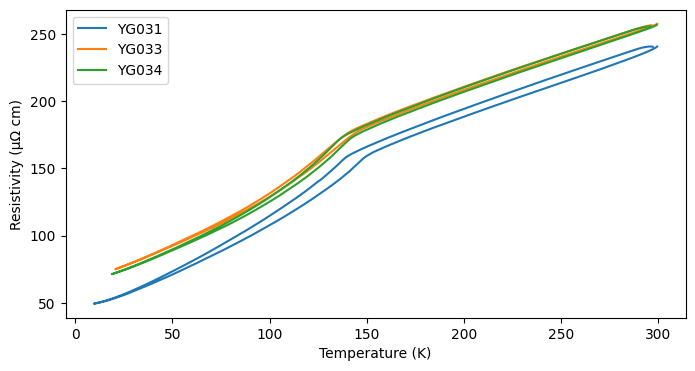

In [9]:
w, l = 20*1e-6, 95*1e-6
d_list = [35.58*1e-9, 39.44*1e-9, 33.75*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG031_YG_31_RT_2.dat',
        '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG033_YG33_rt.dat',
        '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG034_RT_1.dat']
R_list, T_list = [], []

for d, file in zip(d_list, files):
    func = Resistivity_temperature(file, printing=True)
    R, T = func.calculate_R_T(d=d, w=w, l=l)
    R_list.append(R)
    T_list.append(T)
func.plot_R_T(R_list, T_list, ['YG031', 'YG033', 'YG034'])

In [8]:
glob.glob('../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/*Hall*.dat') + glob.glob('../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/*hall*.dat')

['../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG031_YG_31_Hall_2.dat',
 '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG031_YG_31_Hall_1.dat',
 '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG034_YG34_Hall.dat',
 '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG033_YG33_hall.dat',
 '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG033_YG33_hall_2.dat']

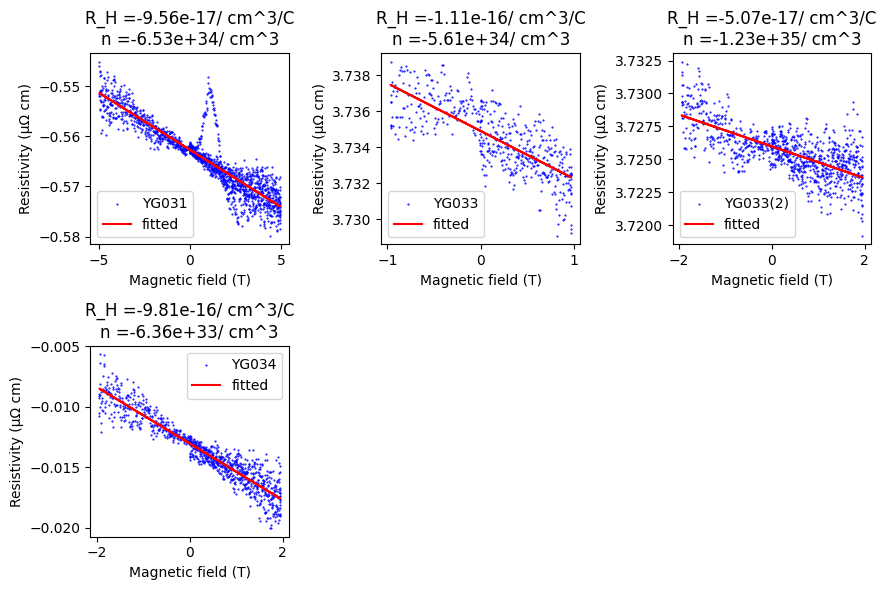

In [12]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 42*1e-9, 421e-9]
files = ['../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG031_YG_31_Hall_2.dat',
        '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG033_YG33_hall.dat',
        '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG033_YG33_hall_2.dat',
        '../datasets/plume_dynamic_SRO/set_2-YG031-034/electrical/YG034_YG34_Hall.dat',]
labels = ['YG031', 'YG033', 'YG033(2)', 'YG034']
R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], [], []
for d, file in zip(d_list, files):

    hall_func = hall_measurement(file, printing=False)
    R_fit, a, b, B, R = hall_func.fit_B_R()
    R_H = hall_func.calculate_hall_coefficient(d)
    n = hall_func.calculate_carrier_density(d)

    R_H_list.append(R_H)   
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list, labels)

# Set 3 - YG035, YG036, YG037

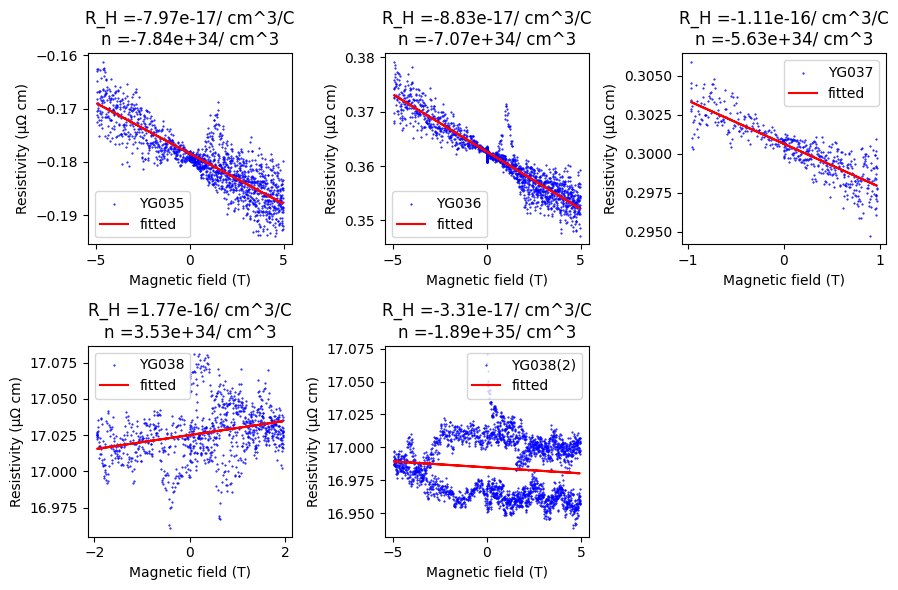

In [13]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 40*1e-9, 36.2*1e-9, 36.2*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_3-YG035-038/electrical/YG035_YG_35_Hall_1.dat', 
         '../datasets/plume_dynamic_SRO/set_3-YG035-038/electrical/YG036_YG_36_Hall_1.dat', 
         '../datasets/plume_dynamic_SRO/set_3-YG035-038/electrical/YG037_Hall.dat',
         '../datasets/plume_dynamic_SRO/set_3-YG035-038/electrical/YG038_YG38_hall.dat',
         '../datasets/plume_dynamic_SRO/set_3-YG035-038/electrical/YG038_YG38_hall_2.dat']
labels = ['YG035', 'YG036', 'YG037', 'YG038', 'YG038(2)']
R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], [], []
for d, file in zip(d_list, files):

    hall_func = hall_measurement(file, printing=False)
    R_fit, a, b, B, R = hall_func.fit_B_R()
    R_H = hall_func.calculate_hall_coefficient(d)
    n = hall_func.calculate_carrier_density(d)

    R_H_list.append(R_H)   
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list, labels)